
### Advanced Machine Learning

# (Stochastic) Gradient Descent, Gradient Boosting and Imbalanced Data

12/04/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)




# Gradient Descent

<center>
<img src="./images/gradient_3d.png" style="width: 600px;">
</center>



Want: $$\arg \min_w F(w)$$

Initialize $w_0$

$$w^{(i+1)} \leftarrow w^{(i)} - \eta_i\frac{d}{dw}F(w^{(i)})$$

Converges to local minimum




# Gradient Descent

$$w^{(i+1)} \leftarrow w^{(i)} - \eta_i\frac{d}{dw}F(w^{(i)})$$


<center>
<img src="./images/gradient_2d.png" style="width: 600px;">
</center>




## Example: Linear Regression (reminder)
$$\hat{y} = w^T \mathbf{x} + b = \sum_{i=1}^p w_i x_i +b $$

optimize SSE $$  \min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2$$

let's consider a simple case with just one variable

$$\min_{a \in \mathbb{R}, b\in\mathbb{R}} \sum_{i=1}^n (a\mathbf{x}_i + b - y_i)^2$$


## Example: Gradient Descent for Linear Regression

1. Initialize the weights ($a$ & $b$) with random values and calculate Error ($SSE$)
2. Calculate the gradient i.e. change in $SSE$ when the weights ($a$ & $b$) are changed by learning rate and derivative from their original randomly initialized value. 
3. Adjust the weights with the gradients to reach better values where $SSE$ is lower
4. Use the new weights for prediction and to calculate the new $SSE$
5. Repeat steps 2-4 till further adjustments to weights doesn’t significantly reduce the Error


<center>
<img src="./images/initial_housing_data2.png" style="width: 600px;">
</center>


## Step 1

Fit an initial equation $\hat{y}$ = $a + b X$, start off with random values of $a$ and $b$ and calculate prediction error ($SSE$)

<center>
<img src="./images/grad_desc_step1.png" style="width: 600px;">
</center>


## Step 2

Calculate the error gradient w.r.t the weights
$$ SSE = \frac{1}{2}\sum_{i=1}^n (y_i - \hat{y})^2 $$
$$\min_{a \in \mathbb{R}, b\in\mathbb{R}} \frac{1}{2} \sum_{i=1}^n ( y_i - (b\mathbf{x}_i + a))^2$$


$$ \frac{\partial SSE}{\partial a} = -\sum_{i=1}^n (y_i - b\mathbf{x}_i - a ) = -\sum_{i=1}^n (y_i - \hat{y})  $$
$$ \frac{\partial SSE}{\partial b} = -\sum_{i=1}^n (y_i - b\mathbf{x}_i - a ) x_i = -\sum_{i=1}^n (y_i - \hat{y})x_i $$




<center>
<img src="./images/grad_desc_step2.png" style="width: 600px;">
</center>

## Step 3

Adjust the weights with the gradients to reach better values where $SSE$ is lower

<center>
<img src="./images/grad_desc_step3a.jpg" style="width: 600px;">
</center>


## Step 3 - continued

We need to update the random values of $a$,$b$ so that we move in the direction of optimal $a$, $b$.

Update rules:

   $$ a^{(i+1)} = a^i – \frac{\partial SSE}{\partial a} $$
   
   
   $$ b^{(i+1)} = b^i – \frac{\partial SSE}{\partial b} $$

So, update rules:

$$ a^{2} = a^{1} – r * \frac{∂SSE}{∂a} = 0.45-0.01*3.300 = 0.42 $$
    
$$ b^{2} = b^{1} – r * \frac{∂SSE}{∂b} = 0.75-0.01*1.545 = 0.73 $$

here, r is the learning rate = 0.01, which is the pace of adjustment to the weights.




## Step 4

Use new $a$ and $b$ for prediction and to calculate new Total $SSE$

<center>
<img src="./images/grad_desc_step4.png" style="width: 600px;">
</center>


## Step 5

Repeat step $3$ and $4$ till the time further adjustments to $a$, $b$ doesn’t significantly reduces the error. At that time, we have arrived at the optimal $a$,$b$ with the highest prediction accuracy.




# Choosing a learning rate

$$w^{(i+1)} \leftarrow w^{(i)} - \eta_i\frac{d}{dw}F(w^{(i)})$$

<center>
<img src="./images/gradient_learning_rates.png" style="width: 600px;">
</center>





# (Stochastic) Gradient Descent

Logistic Regression Objective:

$$F(w, b) = -C \sum_{i=1}^n\log(\exp(-y_iw^T \textbf{x}_ii -b) +1 ) + ||w||_2^2$$

Gradient:

$$\frac{d}{dw}F(w) = \frac{d}{dw} -C \sum_{i=1}^n\log(\exp(-y_iw^T \textbf{x}_i - b) +1 ) + ||w||_2^2$$

Stochastic Gradient: Pick $x_i$ randomly, then

$$\frac{d}{dw}F(w) \approx \frac{d}{dw} -C \log(\exp(-y_iw^T \textbf{x}_ii -b) +1 ) + \frac{1}{n}||w||_2^2$$

In practice: just iterate over i.





# SGDClassifier, SGDRegressor and partial_fit
```python
# Run until convergence
sgd = SGDClassifier().fit(X_train, y_train)

# Run one iteration over a batched dataset
sgd = SGDClassifier()
for X_batch, y_batch in batches:
    sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])

# Run several iterations over a batched datasets
for i in range(10):
    for X_batch, y_batch in batches:
        sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
```





# SGD and partial_fit

- SGDClassifier(), SGDRegressor() fast on very large datasets
- Tuning learning rate and schedule can be tricky.
- partial_fit allows working with out-of-memory data!




# Boosting 

$$f(x) = \sum_k g_k(x)$$

 - Family of algorithms to create "strong" learner $f$ from "weak" learners $g_k$.
 - AdaBoost, GentleBoost, LogitBoost, …



# Gradient Boosting



# Gradient Boosting Algorithm



$$ f_{1}(x) \approx y  $$

$$ f_{2}(x) \approx y - f_{1}(x) $$

$$ f_{3}(x) \approx y - f_{1}(x) - f_{2}(x)$$





$y \approx$ ![:scale 22.5%](images/grad_boost_term_1.png) + ![:scale 22.5%](images/grad_boost_term_2.png) + ![:scale 20%](images/grad_boost_term_3.png) + ...


# Gradient Boosting Algorithm



$$ f_{1}(x) \approx y  $$

$$ f_{2}(x) \approx y - \gamma f_{1}(x) $$

$$ f_{3}(x) \approx y - \gamma f_{1}(x) - \gamma f_{2}(x)$$


$y \approx \gamma$ ![:scale 22.5%](images/grad_boost_term_1.png) + $\gamma$ ![:scale 22.5%](images/grad_boost_term_2.png) + $\gamma$ ![:scale 20%](images/grad_boost_term_3.png) + ...
<br />
<br />
Learning rate $\gamma, i.e. 0.1$




# Early stopping

- Adding trees can lead to overfitting
- Stop adding trees when validation accuracy stops increasing

two choices:

- pick number of trees and tune learning rate

- pick learning rate, use early stopping



# Tuning of Gradient Boosting
- Typically strong pruning via max_depth
- Tune max_features
- Tune column subsampling, row subsampling
- Regularization
- Pick learning rate and do early stopping
- Or Pick n_estimators, tune learning rate (if not early stopping)


# Improvements:
# "extreme" gradient boosting

[XGBoost: A Scalable Tree Boosting System, 2016](http://dmlc.cs.washington.edu/data/pdf/XGBoostArxiv.pdf)



# XGBoost
`conda install -c conda-forge xgboost`

```python
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)
```

- supports missing values
- GPU training
- networked parallel training
- monotonicity constraints
- supports sparse data



# Gradient Boosting Advantages

- Very fast using XGBoost (or HistGradientBoosting, LightGBM)
- Small model size
- Typically more accurate than Random Forests


- "old" GradientBoosting in sklearn is comparatively slow


# Concluding tree-based models



class:spacious
# When to use tree-based models
- Model non-linear relationships
- Doesn’t care about scaling, no need for feature engineering
- Single tree: very interpretable (if small)
- Random forests very robust, good benchmark
- Gradient boosting often best performance with careful tuning


# Calibration

- Probabilities can be much more informative than labels:

- “The model predicted you don’t have cancer” vs “The model predicted you’re 40% likely to have cancer”

further reading can be found in this [article](http://www.datascienceassn.org/sites/default/files/Predicting%20good%20probabilities%20with%20supervised%20learning.pdf)


# Calibration curve (Reliability diagram)


<center>
<img src="./images/prob_table.png" style="width: 600px;">
</center>



```python
from sklearn.calibration import calibration_curve
probs = lr.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)
[ 0.2    0.303  0.458  0.709  0.934]
[ 0.138  0.306  0.498  0.701  0.926]
```

![:scale 70%](images/predprob_positive.png)



# Influence of number of bins

<center>
<img src="./images/influence_bins.png" style="width: 600px;">
</center>

## Comparing Models

<center>
<img src="./images/calib_curve_models.png" style="width: 600px;">
</center>

# Fixing it: Calibrating a classifier
- Build another model, mapping classifier probabilities to better probabilities!
- 1d model! (or more for multi-class)

$$ f_{calib}(s(x)) \approx p(y)$$


- s(x) is score given by model, usually
- Can also work with models that don’t even provide probabilities!
Need model for $f_{calib}$, need to decide what data to train it on.
- Can train on training set → Overfit
- Can train using cross-validation → use data, slower


# Platt Scaling

- Use a logistic sigmoid for $f_{calib}$
- Basically learning a 1d logistic regression
- (+ some tricks)
- Works well for SVMs

$$f_{platt} = \frac{1}{1 + exp(-ws(x) - b)}$$


# Isotonic Regression

- Very flexible way to specify $f_{calib}$
- Learns arbitrary monotonically increasing step-functions in 1d.
- Groups data into constant parts, steps in between.
- Optimum monotone function on training data (wrt mse).


<center>
<img src="./images/isotonic_regression.png" style="width: 600px;">
</center>

# Building the model
- Using the training set is bad
- Either use hold-out set or cross-validation
- Cross-validation can be used to make unbiased probability predictions, use that as training set.


# Fitting the calibration model
<center>
<img src="./images/calibration_val_scores.png" style="width: 600px;">
</center>

# Fitting the calibration model
<center>
<img src="./images/calibration_val_scores_fitted.png" style="width: 600px;">
</center>

# CalibratedClassifierCV

```python
from sklearn.calibration import CalibratedClassifierCV
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train,
                                                          stratify=y_train, random_state=0)
rf = RandomForestClassifier().fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, scores, n_bins=20)
```


<center>
<img src="./images/random_forest.png" style="width: 600px;">
</center>

# Calibration on Random Forest

```python
cal_rf = CalibratedClassifierCV(rf, cv="prefit", method='sigmoid')
cal_rf.fit(X_val, y_val)
scores_sigm = cal_rf.predict_proba(X_test)[:, 1]

cal_rf_iso = CalibratedClassifierCV(rf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_val, y_val)
scores_iso = cal_rf_iso.predict_proba(X_test)[:, 1]
```


<center>
<img src="./images/types_calib.png" style="width: 600px;">
</center>

# Cross-validated Calibration

```python
cal_rf_iso_cv = CalibratedClassifierCV(rf, method='isotonic')
cal_rf_iso_cv.fit(X_train, y_train)
scores_iso_cv = cal_rf_iso_cv.predict_proba(X_test)[:, 1]
```

<center>
<img src="./images/types_calib_cv.png" style="width: 600px;">
</center>

# Two sources of imbalance

- Asymmetric cost
- Asymmetric data

# Why do we care?

- Why should cost be symmetric?
- All data is imbalanced
- Detect rare events


In [3]:
#first method - what can we do here?
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
y_pred = lr.predict_proba(X_test)[:, 1] > .85

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.98      0.90        53
           1       0.99      0.88      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.91       143
weighted avg       0.93      0.92      0.92       143



In [43]:
from sklearn.datasets import fetch_openml
# mammography https://www.openml.org/d/310
data = fetch_openml('mammography', as_frame=True)
X, y = data.data, data.target
X.shape

(11183, 6)

In [6]:
y.value_counts()

-1    10923
1       260
Name: class, dtype: int64

In [44]:
# make y boolean
# this allows sklearn to determine the positive class more easily
X_train, X_test, y_train, y_test = train_test_split(X, y == '1', random_state=0)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

scores = cross_validate(LogisticRegression(),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
  

(0.918891506439645, 0.6414186442735843)

In [9]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_validate(RandomForestClassifier(),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
 

(0.9397708663466044, 0.7401040166316957)

# Basic Approaches

- change the data
  - add samples
  - remove samples
  - both
- change the training procedure

# Imbalance-Learn

http://imbalanced-learn.org

```
pip install -U imbalanced-learn
```

Extends `sklearn` API

### Sampler

- To resample a data sets, each sampler implements `sample` method
```python
  data_resampled, targets_resampled = obj.sample(data, targets)
```

- Fitting and sampling can also be done in one step, using `fit_resample`

```python
  data_resampled, targets_resampled = obj.fit_resample(data, targets)
```

-  In Pipelines: Sampling only done in fit!


In [12]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_resample(
    X_train, y_train)
print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))

(8387, 6)
(392, 6)
[196 196]


In [14]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegressionCV

undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegressionCV())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.9180, 0.64

(0.9102987534502297, 0.5708443138695001)

In [16]:
undersample_pipe_rf = make_imb_pipeline(RandomUnderSampler(),
                                        RandomForestClassifier())
scores = cross_validate(undersample_pipe_rf,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.939, 0.74

(0.9456055985805664, 0.6341404950168421)

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(
    X_train, y_train)
print(X_train.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))


(8387, 6)
(16382, 6)
[8191 8191]


In [19]:
oversample_pipe = make_imb_pipeline(RandomOverSampler(), LogisticRegression())
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.920, 0.630


(0.9234420400594983, 0.5577447362579694)

In [21]:
oversample_pipe_rf = make_imb_pipeline(RandomOverSampler(),
                                       RandomForestClassifier())
scores = cross_validate(oversample_pipe_rf,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.939, 0.722


(0.9182500536833013, 0.7061310475947156)

# Class-weights

- Instead of repeating samples, re-weight the loss function.
- Works for most models!
- Same effect as over-sampling (though not random), but not as expensive (dataset size the same).

# Class-weights in linear models

$$\min_{w \in ℝ^{p}, b \in \mathbb{R}}-C \sum_{i=1}^n\log(\exp(-y_i(w^T \textbf{x}_i + b )) + 1) + ||w||_2^2$$

$$\min_{w \in ℝ^{p}, b \in \mathbb{R}}-C \sum_{i=1}^n c_{y_i}  \log(\exp(-y_i(w^T \textbf{x}_i + b )) + 1) + ||w||_2^2$$

Similar for linear and non-linear SVM


In [50]:
scores = cross_validate(LogisticRegression(class_weight='balanced'),
#scores = cross_validate(LogisticRegression(class_weight=[1,100]),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.920, 0.630


(0.9235896730569388, 0.5644209092265684)

In [24]:
scores = cross_validate(RandomForestClassifier(n_estimators=100,
                                               class_weight='balanced'),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.939, 0.722


(0.9180817310631173, 0.7046508711873969)

## Synthetic Sample Generation


# Synthetic Minority Oversampling Technique (SMOTE)

- Adds synthetic interpolated data to smaller class
- For each sample in minority class:</br>
    - Pick random neighbor from k neighbors.</br>
    - Pick point on line connecting the two uniformly (or within rectangle)</br>
    - Repeat.</br>



<center>
<img src="./images/smote_mammography.png" style="width: 600px;">
</center>




In [51]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote_pipe = make_imb_pipeline(SMOTE(), LogisticRegression())
scores = cross_validate(smote_pipe, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()
# baseline was 0.920, 0.630


test_roc_auc              0.921647
test_average_precision    0.559659
dtype: float64

In [36]:
smote_pipe_rf = make_imb_pipeline(SMOTE(),
                                  RandomForestClassifier())
scores = cross_validate(smote_pipe_rf, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()
# baseline was 0.939, 0.722


test_roc_auc              0.938048
test_average_precision    0.707201
dtype: float64

The results are pretty similar to either the original dataset or the random sampling. Performing nearest neighbors, I found 11 to be best.

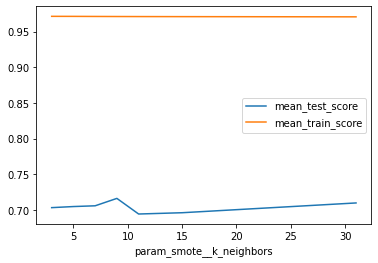

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'smote__k_neighbors': [3, 5, 7, 9, 11, 15, 31]}
search = GridSearchCV(smote_pipe_rf, param_grid, cv=10,
                      scoring="average_precision",return_train_score=True)
search.fit(X_train, y_train)
results = pd.DataFrame(search.cv_results_)
results.plot("param_smote__k_neighbors", ["mean_test_score", "mean_train_score"])


<center>
<img src="./images/smote_k_neighbors.png" style="width: 600px;">
</center>


# Summary

- calibration can help tuning the model and prediction
- Always check roc_auc and average_precision look at curves
- Undersampling is very fast and can help!
- Undersampling + Ensembles is very powerful!
- Can add synthetic samples with SMOTE


# Questions?